In [1]:
%matplotlib inline

In [2]:
# Useful for being able to dump images into the Notebook
import IPython.display as D

# Policy Recognition with MobileNet and Transfer Learning 

In the previous tutorials we outlined our policy classfication challenge and showed how we can approach it using the Custom Vision Cognitive Service. This tutorial introduces deep transfer learning as a means to leverage multiple data sources to overcome data scarcity problem.

In [2]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Part 1 Processing Images and Creating Train and Test Sets

We need to be able to represent our images and their classes in a way that a model can understand. To do this we will flatten the images to a vector (28x28 image pixels becomes an array of length 784 data points).

![](https://www.cntk.ai/jup/cntk103a_MNIST_input.png)

We also need a way for the model to know what a three is or what valid vs invalid is. To acomplish this labels are encoded as [1-hot]( https://en.wikipedia.org/wiki/One-hot) encoding (label of 3 with 10 digits becomes `0001000000`, where the first index corresponds to digit `0` and the last one corresponds to digit `9`. When we train a model we use this value as our target. 

![](https://www.cntk.ai/jup/cntk103a_onehot.png)

In [4]:
from keras.datasets import mnist 
from keras.utils import np_utils 

output_dim = nb_classes = 10 
batch_size = 128 
nb_epoch = 5

# the data, shuffled and split between train and test sets 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

input_dim = 784 #28*28 
X_train = x_train.reshape(60000, input_dim) 
X_test = x_test.reshape(10000, input_dim) 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train /= 255 
X_test /= 255

Y_train = np_utils.to_categorical(y_train, nb_classes) 
Y_test = np_utils.to_categorical(y_test, nb_classes)

## Linear Models 

[Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression) (LR) is a fundamental machine learning technique that uses a linear weighted combination of features and generates probability-based predictions of different classes. 
![](https://www.cntk.ai/jup/logistic_neuron2.jpg)

The way this works is that we take our sequence of data pass it through the LR model compare it's numerical output with our onehot label and then use an optimization function to update our linear weights until they converge on the correct reprentation of our data. 

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 

model = Sequential() 
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax')) 
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,verbose=1, validation_data=(X_test, Y_test)) 
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test Loss:', score[0]) 
print('Test accuracy:', score[1])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 16us/step - loss: 1.2899 - acc: 0.6898 - val_loss: 0.8185 - val_acc: 0.8255
Epoch 2/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.7228 - acc: 0.8374 - val_loss: 0.6113 - val_acc: 0.8588
Epoch 3/5
60000/60000 [==============================] - 1s 11us/step - loss: 0.5912 - acc: 0.8575 - val_loss: 0.5281 - val_acc: 0.8724
Epoch 4/5
60000/60000 [==============================] - 1s 11us/step - loss: 0.5280 - acc: 0.8681 - val_loss: 0.4821 - val_acc: 0.8800
Epoch 5/5
60000/60000 [==============================] - 1s 13us/step - loss: 0.4897 - acc: 0.8749 - val_loss: 0.4514 - val_acc: 0.8858
Test Loss: 0.4514175675392151
Test accuracy: 0.8858


## Non Linear Models (MLP)
As you can imagine the just incrementing one weight value makes it hard to represent our dataset what if we had a way of combining multiple linear models. We can do this with a feed forward network such as the Multi Layer Perceptron Below.

![](https://upload.wikimedia.org/wikipedia/en/5/54/Feed_forward_neural_net.gif)

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
output_dim = nb_classes = 10 
batch_size = 128 
nb_epoch = 5

model = Sequential() 
model.add(Dense(input_dim, input_dim=input_dim, activation='relu')) 
model.add(Dense(input_dim, input_dim=input_dim, activation='relu'))
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax')) 

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,verbose=1, validation_data=(X_test, Y_test)) 
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test Loss:', score[0]) 
print('Test accuracy:', score[1])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 150us/step - loss: 1.0790 - acc: 0.7676 - val_loss: 0.5100 - val_acc: 0.8773
Epoch 2/5
60000/60000 [==============================] - 9s 143us/step - loss: 0.4401 - acc: 0.8866 - val_loss: 0.3650 - val_acc: 0.9011
Epoch 3/5
60000/60000 [==============================] - 12s 194us/step - loss: 0.3530 - acc: 0.9032 - val_loss: 0.3136 - val_acc: 0.9127
Epoch 4/5
60000/60000 [==============================] - 16s 272us/step - loss: 0.3129 - acc: 0.9124 - val_loss: 0.2868 - val_acc: 0.9188
Epoch 5/5
60000/60000 [==============================] - 12s 203us/step - loss: 0.2875 - acc: 0.9194 - val_loss: 0.2659 - val_acc: 0.9246
Test Loss: 0.2659078140795231
Test accuracy: 0.9246


## What happens when we have a lot of really large images? 

Notice how much slower that was. When we have images greater than 500k to 1mb it gets increasingly more computationally expensive to process our image as a sequence additionally it becomes much more challenging to detect complex self referential and hierarchical patterns in our sequence data. 

# Part 2 Traditional Computer Vision 101

What if instead of passing our full image we extracted features and made decisions on those. That is how computer vision worked until recently lets take a deeper look by trying to use edges as a feature for our model.

### Example Masks   

To do this we first we take an image.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Valve_original_%281%29.PNG/300px-Valve_original_%281%29.PNG)

Src [Wikimedia Commons](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Valve_original_%281%29.PNG/300px-Valve_original_%281%29.PNG)

Then we take a [sobel matrix](https://en.wikipedia.org/wiki/Sobel_operator) that is used to find edges.
![](https://www.researchgate.net/publication/275073476/figure/fig6/AS:340842360393754@1458274560103/Sobel-masks-a-horizontal-mask-and-b-vertical-mask.png)

src [researchgate publication #275073476](https://www.researchgate.net/publication/275073476/figure/fig6/AS:340842360393754@1458274560103/Sobel-masks-a-horizontal-mask-and-b-vertical-mask.png)

We apply the sobel matrix to our image in strides like a filter 
![](https://www.cntk.ai/jup/cntk103d_padding_strides.gif)

And when we map the result we get the following edges which we can use as features
![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Valve_sobel_%283%29.PNG/300px-Valve_sobel_%283%29.PNG)
Src [Wikimedia Commons](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Valve_sobel_%283%29.PNG/300px-Valve_sobel_%283%29.PNG)

In [ ]:
#based on https://www.kaggle.com/spsayakpaul/mnist-with-keras-cnn
from keras import backend as K 
img_rows, img_cols = 28, 28

# the data, split between train and test sets
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, nb_classes)
y_test = keras.utils.to_categorical(y_test, nb_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Part 3 Intro to the Convolution Neural Network (CNN 101)

Creating these masks by hand is hardwork and brittle what if we could learn them, introducing the CNN.

A CNN is a deep neural network comprised of a bunch of layers in such a way that the output of one layer is fed to the next layer (There are more complex architecture that skip layers with dropout we will take this as a given for now). Usually, CNN's start with alternating between convolution layer and pooling layer (downsample), then end up with fully connected layer for the classification part. 




### Convolve 

A convolution layer is a set of filters. Each filter is defined by a weight (**W**) matrix, and  bias ($b$).

![](https://www.cntk.ai/jup/cntk103d_padding_strides.gif)

### Pool 

Once we apply our mask we use pooling to reduce the dimensionality of the previous layer, which speeds up the network.

![](https://cntk.ai/jup/201/MaxPooling.png)

Here an example of max pooling with a stride of 2:

### Putting it all together

![](https://www.mathworks.com/content/mathworks/www/en/discovery/convolutional-neural-network/jcr:content/mainParsys/image_copy.adapt.full.high.jpg/1508999490138.jpg")

src [mathworks.com](https://www.mathworks.com/content/mathworks/www/en/discovery/convolutional-neural-network/jcr:content/mainParsys/image_copy.adapt.full.high.jpg/1508999490138.jpg)

In [ ]:
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 177s 3ms/step - loss: 0.2638 - acc: 0.9204 - val_loss: 0.0662 - val_acc: 0.9790
Epoch 2/5
60000/60000 [==============================] - 173s 3ms/step - loss: 0.0882 - acc: 0.9732 - val_loss: 0.0404 - val_acc: 0.9865
Epoch 3/5
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0651 - acc: 0.9806 - val_loss: 0.0350 - val_acc: 0.9883
Epoch 4/5
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0549 - acc: 0.9836 - val_loss: 0.0334 - val_acc: 0.9887
Epoch 5/5
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0472 - acc: 0.9859 - val_loss: 0.0322 - val_acc: 0.9899
Test loss: 0.03221080291894468
Test accuracy: 0.9899


# Part 4 Intro To Transfer Learning

In the MNIST dataset we had tens of thousands of training examples what if we have less data. That is where we can use transfer learning. However, the number of images is far less than what is needed to train a state-of-the-art classifier such as a [Residual Network](https://github.com/KaimingHe/deep-residual-networks). So we will use a pretrained network MobileNet network and try to learn a classifier. 

![](http://www.cntk.ai/jup/cntk301_imagenet.jpg)


### What is Transfer Learning?

With Transfer Learning, we use an existing trained model and adapt it to our own problem. We are essentially building upon the features and concepts that were learned during the training of the base model. With a Convolutional DNN (MobileNet in this case), we are using the features learned from ImageNet data and _cutting off_ the final classification layer, replacing it with a new dense layer that will predict the class labels of our new domain. 

The input to the old and the new prediction layer is the same, we simply reuse the trained features. Then we train this modified network, either only the new weights of the new prediction layer or all weights of the entire network.

This can be used, for instance, when we have a small set of images that are in a similar domain to an existing trained model. Training a Deep Neural Network from scratch requires tens of thousands of images, but training one that has already learned features in the domain you are adapting it to requires far fewer. 


In our case, this means adapting a network trained on ImageNet images (dogs, cats, birds, etc.) to flowers, or sheep/wolves. However, Transfer Learning has also been successfully used to adapt existing neural models for translation, speech synthesis, and many other domains - it is a convenient way to bootstrap your learning process.







### Pre-Trained Model (MobileNet)

This [repo](https://github.com/aditya9898/transfer-learning) was and [post](https://towardsdatascience.com/keras-transfer-learning-for-beginners-6c9b8b7143e) by Aditya Ananthram was used for inspiration.

For this task, we have chosen to use pretrained MobileNet model as our base model lets check performance on our dataset. While there are many classification arcitechtures we'll use MobileNet since it runs fast on a CPU and provides strong results.

In [3]:
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation

model=Model(inputs=base_model.input,outputs=preds)


for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

/usr/local/lib/python3.5/dist-packages/keras_applications/mobilenet.py:207: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


17227776/17225924 [==============================] - 13s 1us/step


#### Lets take a look at this MobileNet model

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
__________

### Lets Process our Data

#### Train Data 

In [4]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/data/dataset/Beverages/Train/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)


Found 180 images belonging to 2 classes.


#### Test Data 

In [5]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
    directory=r"/data/dataset/Beverages/Test/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=1,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

Found 60 images belonging to 2 classes.


#### View Sample of Images Data 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


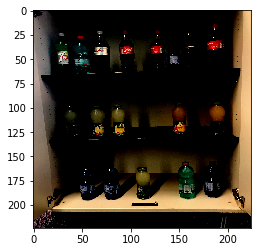

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


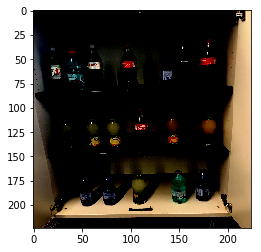

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


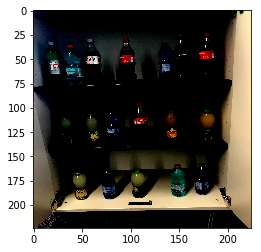

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


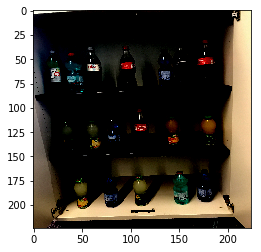

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


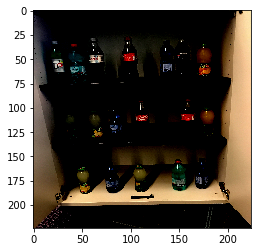

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


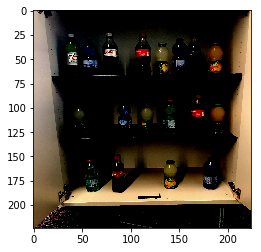

In [6]:
i = 0
for data in test_generator:
    if i > 5: break 
    else: i+=1
    img, cls = data
    print(np.argmax(cls))
    plt.imshow(img[0])
    plt.show()

### Train Model

In [6]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=5)

Epoch 1/5
5/5 [==============================] - 96s 19s/step - loss: 0.8017 - acc: 0.7313
Epoch 2/5
5/5 [==============================] - 77s 15s/step - loss: 0.0101 - acc: 1.0000
Epoch 3/5
5/5 [==============================] - 79s 16s/step - loss: 0.0289 - acc: 0.9937
Epoch 4/5
5/5 [==============================] - 111s 22s/step - loss: 0.0023 - acc: 1.0000
Epoch 5/5
5/5 [==============================] - 87s 17s/step - loss: 0.0025 - acc: 1.0000


![](./train/cats/images%20(1).jpg)

### Benchmark Model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30

   micro avg       1.00      1.00      1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Confusion matrix, without normalization
[[30  0]
 [ 0 30]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


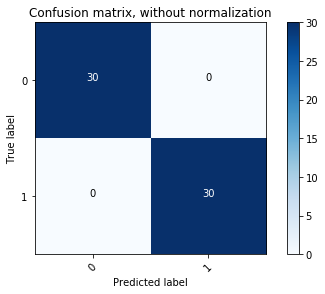

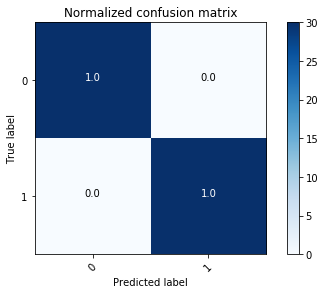

In [7]:
from utils import classification_report
y_true = np.concatenate([np.argmax(test_generator[i][1], axis=1) for i in range(test_generator.n)])
y_pred =  np.argmax(model.predict_generator(test_generator, steps=test_generator.n), axis=1)
classification_report(y_true, y_pred)